In [290]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, argrelmin
import pandas as pd
from collections import Counter
import os

from pathlib import Path

from scipy import signal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [291]:
path_aurora_dataset = Path('/Users/cslinxs/Desktop/aurora_dataset/aurora_dataset/')
auscultatory_data = path_aurora_dataset / "measurements_auscultatory.tsv"
basic_mesures_data = pd.read_csv(auscultatory_data,sep = '\t') 

def get_stats(check_list):
    standard = float(np.std(check_list))
    mean = float(np.mean(check_list))
    return [min(check_list),mean-standard-standard,mean-standard,mean,mean + standard,mean +standard+standard ,max(check_list) ]
def get_person_activity_data(person_id):
    #basic_mesures_data.dropna( inplace=True)
    filler_to_person = basic_mesures_data[basic_mesures_data["pid"] == (person_id)]
    return  filler_to_person["sbp"]


In [292]:
# this will be main loop ---- later....

auscultatory_sbp = []
for person in os.listdir(path_aurora_dataset/"measurements_auscultatory"):
    if "a" in person:
        #print(person)
        auscultatory_sbp.append(get_person_activity_data(person))

In [293]:
def get_50_avg_coordinates(path):
    
    df = pd.read_csv(path,sep = '\t')   
    pos_pressure = df["pressure"]
    neglist = [ -x for x in pos_pressure]

    # ADD THE DROPPING DWOAN AND GETMIN BELLOW a LINE
    min_peaks, _ = find_peaks(neglist, prominence=10,width=80 )


    # juts deleted stuff from both lists if its in tht 40 range 
    # THIS IS THE MOST IMPORTANT 
    most_accurate_mins = min_peaks

    diffrences_new_min = np.diff(most_accurate_mins)
    mean_new_min = float(diffrences_new_min.mean())

    overlapped_means = pd.DataFrame( )
    nans_list = np.full(int(mean_new_min- get_stats(diffrences_new_min)[1]), np.nan)
    
    for i in range(len(most_accurate_mins)-1):
        
        current_pulse_width = int(most_accurate_mins[i+1]) -int(most_accurate_mins[i])
        if (current_pulse_width)< get_stats(diffrences_new_min)[4] and (current_pulse_width)> get_stats(diffrences_new_min)[1]:
            y_range  = list(range(int(most_accurate_mins[i]),int(most_accurate_mins[i+1])))
            y_of_shift = [int(y - min(pos_pressure[y_range])) for y in pos_pressure[y_range]]


            start_end_line = np.linspace(y_of_shift[0], y_of_shift[-1], len(y_of_shift), endpoint=True)
            y_rotated = [xi - yi for xi, yi in zip(y_of_shift, start_end_line)]
            # print("roatte leny ",len(y_rotated))
            # print("added len " , len(list(y_rotated)[:int(mean_new_min)]), len(list(nans_list[:int(mean_new_min) - len(y_rotated)])))
            # print(int(mean_new_min) - len(y_rotated))
            
            if len(y_rotated)>=int(mean_new_min):
                overlapped_means[f"pulse {i}"] = list(y_rotated)[:int(mean_new_min)]
            else:
                overlapped_means[f"pulse {i}"] = list(y_rotated)[:int(mean_new_min)] + list(nans_list[:int(mean_new_min) - len(y_rotated)])

    # WORKS STAY LIKE TAHTA^^^^  MAKES THE MEAN THE HIGHEST VLAUE , 
    #maybe later make it wider but for now it would work the same!
    overlapped_means['mean'] = overlapped_means.mean(axis=1)

    all_overlaps_means = (overlapped_means.mean(axis=1))
    


    resampled_y = signal.resample(all_overlaps_means, 50)
    return resampled_y
    # return new_50


[7.17954371e-03 1.93646506e+00 1.23415649e+01 2.93360597e+01
 4.60464001e+01 5.90886700e+01 6.73317379e+01 7.27743152e+01
 7.64043699e+01 7.90445097e+01 8.07335604e+01 8.16219769e+01
 8.13946747e+01 8.02365232e+01 7.80159551e+01 7.47492859e+01
 6.97354561e+01 6.28670984e+01 5.61210393e+01 5.13485034e+01
 4.80130149e+01 4.57749604e+01 4.43633342e+01 4.36031827e+01
 4.28326591e+01 4.14571639e+01 3.94022731e+01 3.66757330e+01
 3.40201054e+01 3.16554442e+01 2.97227746e+01 2.78786140e+01
 2.59812100e+01 2.39396712e+01 2.18384918e+01 1.98905176e+01
 1.80494475e+01 1.63065076e+01 1.48229648e+01 1.34833138e+01
 1.22016636e+01 1.08559377e+01 9.43673614e+00 7.96441781e+00
 6.60364208e+00 5.16707114e+00 3.84182712e+00 2.43881947e+00
 1.36278795e+00 5.64206192e-01]


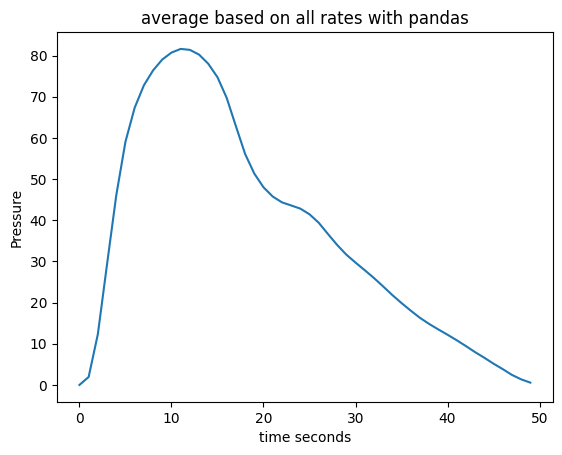

In [294]:
# just testing
path = "/Users/cslinxs/Desktop/aurora_dataset/aurora_dataset/measurements_auscultatory/a000/a000.initial.Calibration_start_1.tsv"
print(get_50_avg_coordinates(path))

plt.plot(get_50_avg_coordinates(path) )

plt.title("average based on all rates with pandas")
plt.ylabel("Pressure")
plt.xlabel("time seconds")

plt.show()
#422.5

In [295]:
person_id ="a000"
activity= "a000.initial.Calibration_start_1.tsv"
auscultatory_data = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory.tsv"
basic_mesures_data = pd.read_csv(auscultatory_data,sep = '\t') 

basic_mesures_data.dropna(subset="waveform_file_path", inplace=True)

filter_to_person = basic_mesures_data[basic_mesures_data["pid"] == person_id]

activity_file_path = f"measurements_auscultatory/{person_id}/{activity}"



# #return filler_to_person[(filler_to_person['waveform_file_path'].str.contains(activity_file_path))]
filter_to_activity = filter_to_person.loc[filter_to_person["waveform_file_path"].str.contains(activity_file_path)]


In [296]:


for person in os.listdir(path_aurora_dataset/"measurements_auscultatory")[:5]:
    if "a" in person:
        #print(person)
        auscultatory_sbp.append(get_person_activity_data(person))

    print(get_50_avg_coordinates(path))



[7.17954371e-03 1.93646506e+00 1.23415649e+01 2.93360597e+01
 4.60464001e+01 5.90886700e+01 6.73317379e+01 7.27743152e+01
 7.64043699e+01 7.90445097e+01 8.07335604e+01 8.16219769e+01
 8.13946747e+01 8.02365232e+01 7.80159551e+01 7.47492859e+01
 6.97354561e+01 6.28670984e+01 5.61210393e+01 5.13485034e+01
 4.80130149e+01 4.57749604e+01 4.43633342e+01 4.36031827e+01
 4.28326591e+01 4.14571639e+01 3.94022731e+01 3.66757330e+01
 3.40201054e+01 3.16554442e+01 2.97227746e+01 2.78786140e+01
 2.59812100e+01 2.39396712e+01 2.18384918e+01 1.98905176e+01
 1.80494475e+01 1.63065076e+01 1.48229648e+01 1.34833138e+01
 1.22016636e+01 1.08559377e+01 9.43673614e+00 7.96441781e+00
 6.60364208e+00 5.16707114e+00 3.84182712e+00 2.43881947e+00
 1.36278795e+00 5.64206192e-01]
[7.17954371e-03 1.93646506e+00 1.23415649e+01 2.93360597e+01
 4.60464001e+01 5.90886700e+01 6.73317379e+01 7.27743152e+01
 7.64043699e+01 7.90445097e+01 8.07335604e+01 8.16219769e+01
 8.13946747e+01 8.02365232e+01 7.80159551e+01 7.47492